<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab13_Logistic_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [86]:
x_data=np.array([1,2,2,3,3,1,4,3,5,3,6,2],np.float32).reshape(6,2)
indices=np.array([0,0,1,1,2,2])
y_data=np.array([0,0,0,1,1,1],np.float32).reshape(6,1)

In [45]:
x_data

array([[1., 2.],
       [2., 3.],
       [3., 1.],
       [4., 3.],
       [5., 3.],
       [6., 2.]], dtype=float32)

In [87]:
y_data=tf.one_hot(indices,depth=3)
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [3]:
x_data.shape

(6, 2)

In [4]:
x_data.shape[1]

2

In [5]:
y_data.shape[1]

1

In [51]:
input_dim=x_data.shape[1]
units=y_data.shape[1]
print(input_dim,units)

2 3


input(nxi), output(nxj) i는 인풋 갯수 j는 아웃풋 갯수, n데이터 갯수
W와 b의 갯수는? W는 ixj개, [i,j] b는 j개 [1,j]

# classfication

In [52]:
learning_rate=1e-2

그렇다면 w와 b의 사이즈를 어떻게 정하는가? 일일이 i와 j의 크기를 넣어줘야 하나? 아니면 자동으로 정할 수 있는가?
x_data와 y_data의 dimension을 뽑을수 있으면 가능함.
- x_data.shape[숫자] : 해당숫자-1에 해당하는 dimension을 뽑음.

In [8]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [57]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [58]:
b=tf.Variable(b_init(shape=(units,)),dtype='float32')

In [59]:
for i in range(10000):
  # loss
  with tf.GradientTape() as tape:
    z=tf.matmul(x_data,w)+b   #매트릭스 곱하기 : np.matmul()
    hypothesis=tf.nn.softmax(z)
    loss=-tf.reduce_mean(tf.reduce_sum(y_data*tf.math.log(hypothesis),axis=1)) #cross entropy

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 1000==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 1.05177640914917
iteration 1000 loss 0.46568772196769714
iteration 2000 loss 0.37359681725502014
iteration 3000 loss 0.3207864761352539
iteration 4000 loss 0.2836014926433563
iteration 5000 loss 0.2553442418575287
iteration 6000 loss 0.23294706642627716
iteration 7000 loss 0.2146739363670349
iteration 8000 loss 0.19943194091320038
iteration 9000 loss 0.1864892989397049


In [66]:
w.numpy()

array([[-2.7579303 ,  0.49583787,  2.271435  ],
       [ 2.7400043 , -1.012867  , -1.6455419 ]], dtype=float32)

In [65]:
b.numpy()

array([ 1.268117 ,  2.432171 , -3.7002916], dtype=float32)

In [64]:
w

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-2.7579303 ,  0.49583787,  2.271435  ],
       [ 2.7400043 , -1.012867  , -1.6455419 ]], dtype=float32)>

In [70]:
    z=tf.matmul(x_data,w)+b   #매트릭스 곱하기 : np.matmul()
    hypothesis=tf.nn.softmax(z)
    hypothesis

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[9.5624089e-01, 4.3601420e-02, 1.5768978e-04],
       [9.7276783e-01, 2.6926810e-02, 3.0538833e-04],
       [6.1983697e-04, 8.0769742e-01, 1.9168270e-01],
       [3.7196819e-02, 6.9003087e-01, 2.7277237e-01],
       [6.2421279e-04, 2.9977068e-01, 6.9960511e-01],
       [7.0017819e-08, 3.7120085e-02, 9.6287984e-01]], dtype=float32)>

In [68]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

# subclassing

In [89]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    logits=tf.matmul(inputs,self.w)+self.b
    return tf.nn.softmax(logits)

In [90]:
# loss
loss=tf.keras.losses.CategoricalCrossentropy()   #yes no만 있는 crossentropy

In [91]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [92]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [93]:
# learning
for i in range(10000):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

  if i % 2000==0:
    print('{} {}'.format(i,loss(y_data,model(x_data))))


0 1.0765711069107056
2000 0.37280771136283875
4000 0.28314700722694397
6000 0.2326596975326538
8000 0.1992349475622177


In [22]:
model.w.numpy()

array([[1.4797696],
       [0.3236718]], dtype=float32)

In [23]:
model.b.numpy()

array([-5.6057944], dtype=float32)

In [94]:
model(x_data)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[9.5613670e-01, 4.3705974e-02, 1.5733733e-04],
       [9.7284770e-01, 2.6848823e-02, 3.0346552e-04],
       [6.1210763e-04, 8.0796331e-01, 1.9142455e-01],
       [3.7193440e-02, 6.9015729e-01, 2.7264926e-01],
       [6.2269811e-04, 2.9961243e-01, 6.9976491e-01],
       [6.9121512e-08, 3.7037216e-02, 9.6296269e-01]], dtype=float32)>

In [95]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

# Sequential model

In [99]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,activation='softmax',kernel_initializer='random_normal'))

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


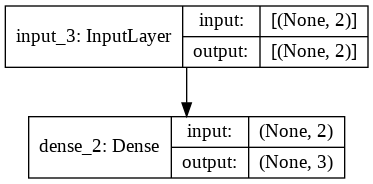

In [100]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [101]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.CategoricalCrossentropy())

In [102]:
# learning
model.fit(x_data,y_data,epochs=10000,verbose=0)

In [103]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 247ms/step - loss: 0.1754


0.17537538707256317

In [104]:
model.get_weights()

[array([[-2.7455685,  0.5038733,  2.2790642],
        [ 2.7271824, -1.0090252, -1.6414634]], dtype=float32),
 array([ 1.2902689,  2.420494 , -3.7107668], dtype=float32)]

In [105]:
y_data

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [106]:
model.predict(x_data)

array([[9.5644230e-01, 4.3400560e-02, 1.5716265e-04],
       [9.7256786e-01, 2.7124187e-02, 3.0796538e-04],
       [6.3876621e-04, 8.0764800e-01, 1.9171315e-01],
       [3.7234884e-02, 6.8994749e-01, 2.7281764e-01],
       [6.2768732e-04, 2.9979467e-01, 6.9957769e-01],
       [7.1947838e-08, 3.7147332e-02, 9.6285266e-01]], dtype=float32)